In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas==1.0.3 
!pip install pmdarima


     |████████████████████████████████| 10.0 MB 4.3 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.0.3 which is incompatible.
fbprophet 0.7.1 requires pandas>=1.0.4, but you have pandas 1.0.3 which is incompatible.


     |████████████████████████████████| 1.5 MB 3.8 MB/s 
     |████████████████████████████████| 9.5 MB 15.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:

# check prophet version
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)
import re
import numpy as np
# fit prophet model on the car sales dataset
from pandas import read_csv
from pandas import to_datetime
from fbprophet import Prophet
import pandas as pd
pd.__version__

Prophet 0.7.1


'1.0.3'

In [ ]:
def data_pre_inf(nick, dir = "/content/drive/MyDrive/data/naphtha/Crude Oil WTI Futures Historical Data.csv", vol = True):
    data = pd.read_csv(dir)
    if vol:
        if (data.dtypes['Vol.'] == 'O'):
            data['Vol.'] = data['Vol.'].str.rstrip('K')
            data['Vol.'] = data['Vol.'].str.rstrip('M')
            data['Vol.'] = data['Vol.'].replace({'-': 0})

            data['Vol.'] = data['Vol.'].astype('float64')#, copy=False)

    data['Change %'] = data['Change %'].str.rstrip('%')
    data['Change %'] = data['Change %'].astype('float64')#, copy=False)
    if data.dtypes['Price'] == 'O':
        data['Price'] = data['Price'].map(lambda x: re.sub(r',', '', x))
        data['Price'] = data['Price'].astype('float64')#, copy=False)

    data['date'] = pd.to_datetime(data['Date']).astype('datetime64[ns]')
    data = data.drop(['Date'], axis= 1)
    data = data.sort_values(['date'])
    data.reset_index(drop=True, inplace = True)
    data = data.iloc[:-1,:]
    data = data.replace({'-': 0})
    data = data.drop(["Open", "Low", "High", "Change %"], axis = 1)
    if vol:
        data.columns = ['Price_' + nick, 'Vol_'+nick, 'date']
    else:
        data.columns = ['Price_' + nick, 'date']

    print(nick, data.shape)
    return data

In [ ]:

dir_list = ["Crude Oil WTI Futures Historical Data.csv",
            "EUR_USD Historical Data.csv",
            "Ethanol Futures Historical Data.csv",
            "GOOGL Historical Data.csv",
            "Natural Gas Futures Historical Data.csv",
            "S&P 500 Historical Data.csv",
            "US 30 Futures Historical Data.csv",
            "United States 10-Year Bond Yield Historical Data.csv",
            "United States 2-Year Bond Yield Historical Data.csv"]

data_wti = data_pre_inf("wti","/content/drive/MyDrive/data/naphtha/" + dir_list[0])
# data_eur_usd = data_pre_inf("eur_usd", "/content/drive/MyDrive/data/naphtha/" + dir_list[1], vol = False)
# data_ethan = data_pre_inf("ethan","/content/drive/MyDrive/data/naphtha/" + dir_list[2])
# data_googl = data_pre_inf("googl","/content/drive/MyDrive/data/naphtha/" + dir_list[3])
# data_gas = data_pre_inf("gas","/content/drive/MyDrive/data/naphtha/" + dir_list[4])
# data_snp500 = data_pre_inf("snp","/content/drive/MyDrive/data/naphtha/" + dir_list[5])
# data_us30 = data_pre_inf("us30","/content/drive/MyDrive/data/naphtha/" + dir_list[6])
# data_us10bond = data_pre_inf("us10bond","/content/drive/MyDrive/data/naphtha/" + dir_list[7], vol = False)
# data_us2bond = data_pre_inf("us2bond","/content/drive/MyDrive/data/naphtha/" + dir_list[8], vol = False)



wti (1868, 3)


In [ ]:
# data = pd.merge(data_wti, data_us2bond, on = 'date', how = 'left')
# data = pd.merge(data, data_us10bond, on = 'date', how = 'left')
# data = pd.merge(data, data_us30, on = 'date', how = 'left')
# data = pd.merge(data, data_snp500, on = 'date', how = 'left')
# data = pd.merge(data, data_gas, on = 'date', how = 'left')
# data = pd.merge(data, data_googl, on = 'date', how = 'left')
# data = pd.merge(data, data_ethan, on = 'date', how = 'left')
# data = pd.merge(data, data_eur_usd, on = 'date', how = 'left')

# data = data.set_index(data.date)
# data.interpolate(method='linear', inplace= True)
# data.reset_index(drop=True, inplace = True)

In [ ]:
# data= data.iloc[:,:8]
# data['date'] = pd.to_datetime(data['date']).astype('datetime64[ns]')

# data.to_csv("/content/WTI.csv", index = False)
# data = pd.read_csv("/content/WTI.csv")

# data.tail(10)

In [ ]:

data_wti['pct_change'] = data_wti.Price_wti.pct_change()
data_wti['log_ret'] = np.log(data_wti.Price_wti) - np.log(data_wti.Price_wti.shift(1))
data = data_wti.iloc[1:, :]
data = data[data.Price_wti >0].dropna()
data['date'] = pd.to_datetime(data['date']).astype('datetime64[ns]')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1865 entries, 1 to 1867
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Price_wti   1865 non-null   float64       
 1   Vol_wti     1865 non-null   float64       
 2   date        1865 non-null   datetime64[ns]
 3   pct_change  1865 non-null   float64       
 4   log_ret     1865 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 87.4 KB


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:679: RuntimeWarning:

invalid value encountered in log



In [ ]:
data = data_wti.iloc[1:, :]
data = data[data.Price_wti >0].dropna()

data.head()

,Price_wti,Vol_wti,date,pct_change,log_ret
1,106.03,175.21,2014-06-24,-0.001319,-0.001320
2,106.50,249.06,2014-06-25,0.004433,0.004423
3,105.84,195.72,2014-06-26,-0.006197,-0.006216
4,105.74,128.98,2014-06-27,-0.000945,-0.000945
5,105.37,215.33,2014-06-30,-0.003499,-0.003505


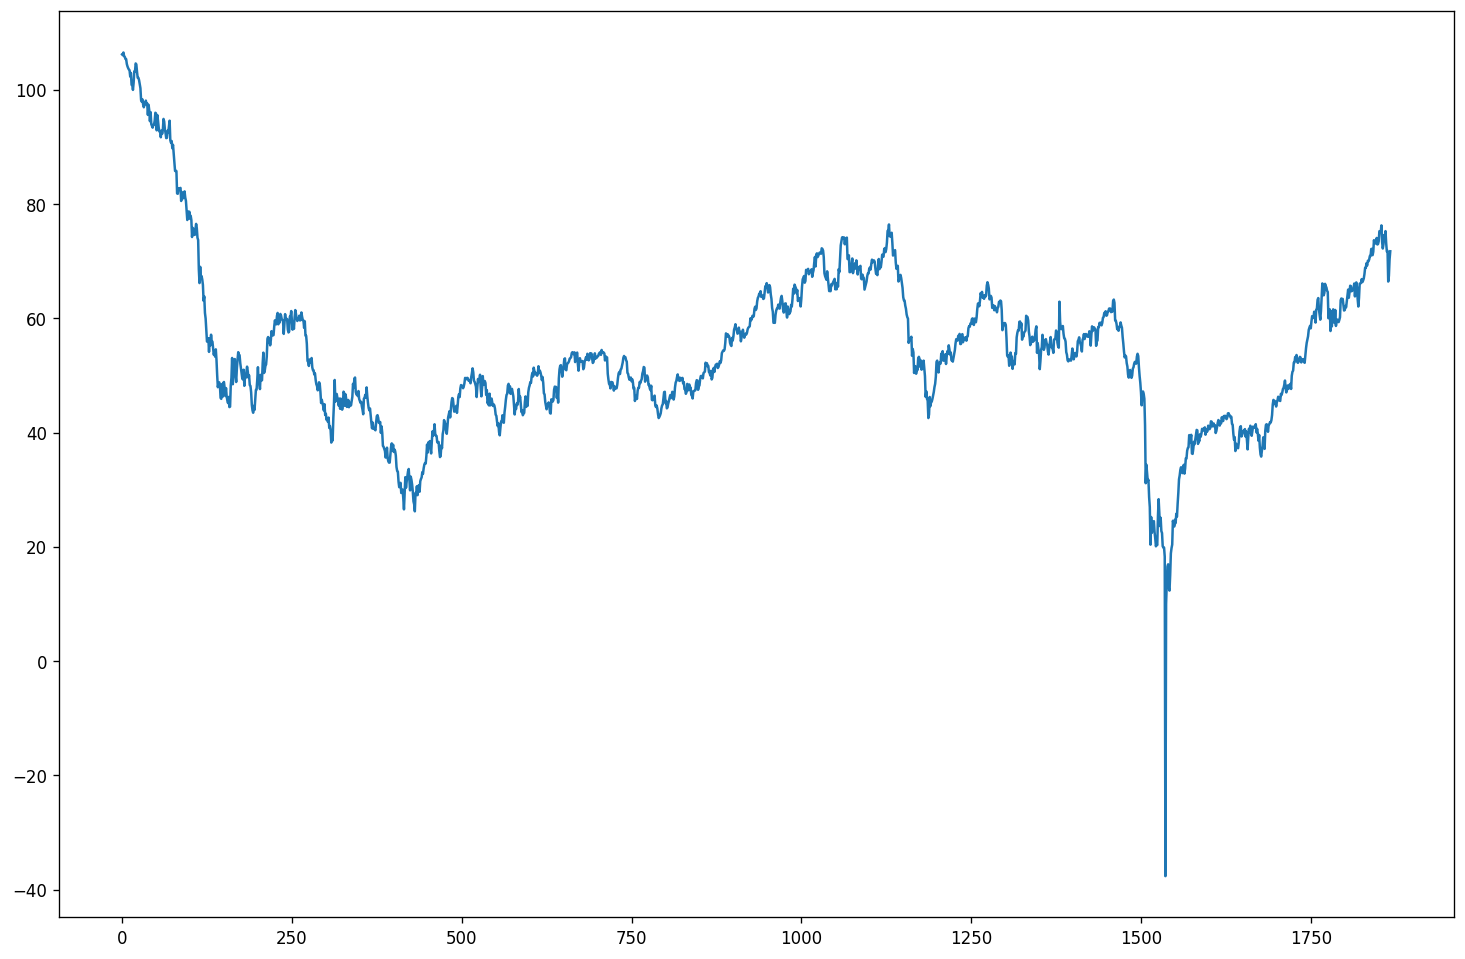

In [ ]:
import matplotlib.pyplot as plt

# data_wti.Price_wti.plot()
plt.figure(figsize=[15,10])
plt.plot(data_wti.Price_wti)

In [ ]:
data.Price_wti[:-30].plot()

In [ ]:
model.plot(forecast)
plt.plot(df2.y)

AttributeError: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


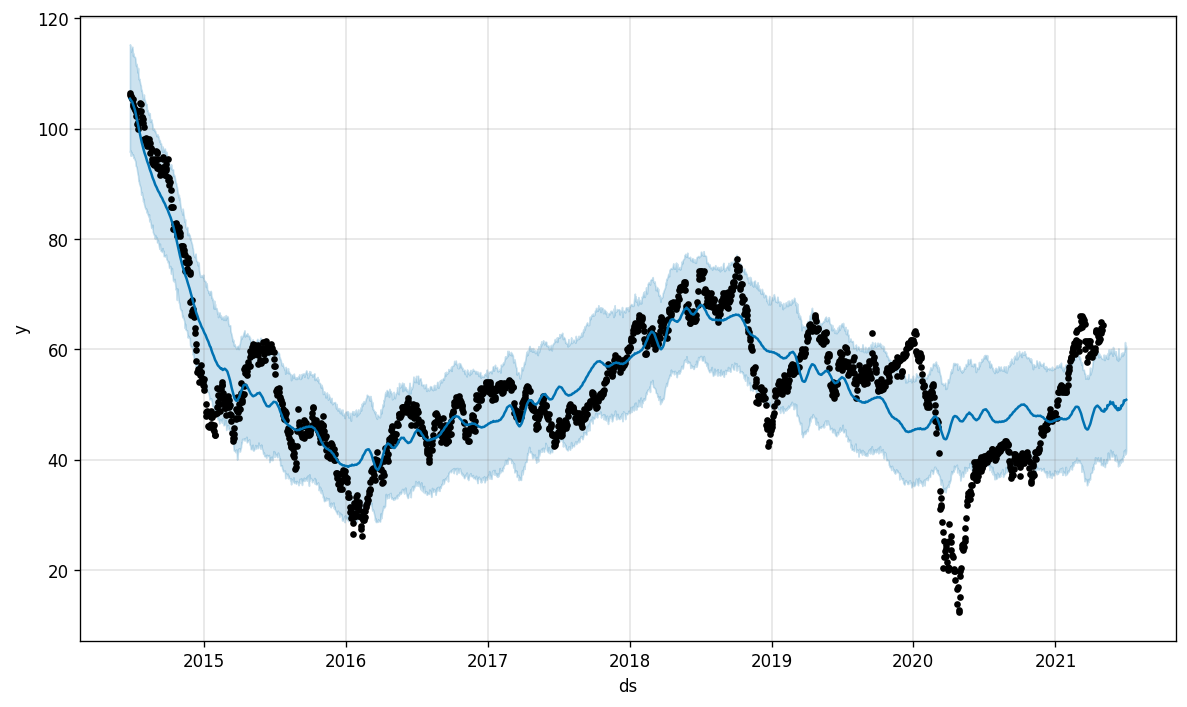

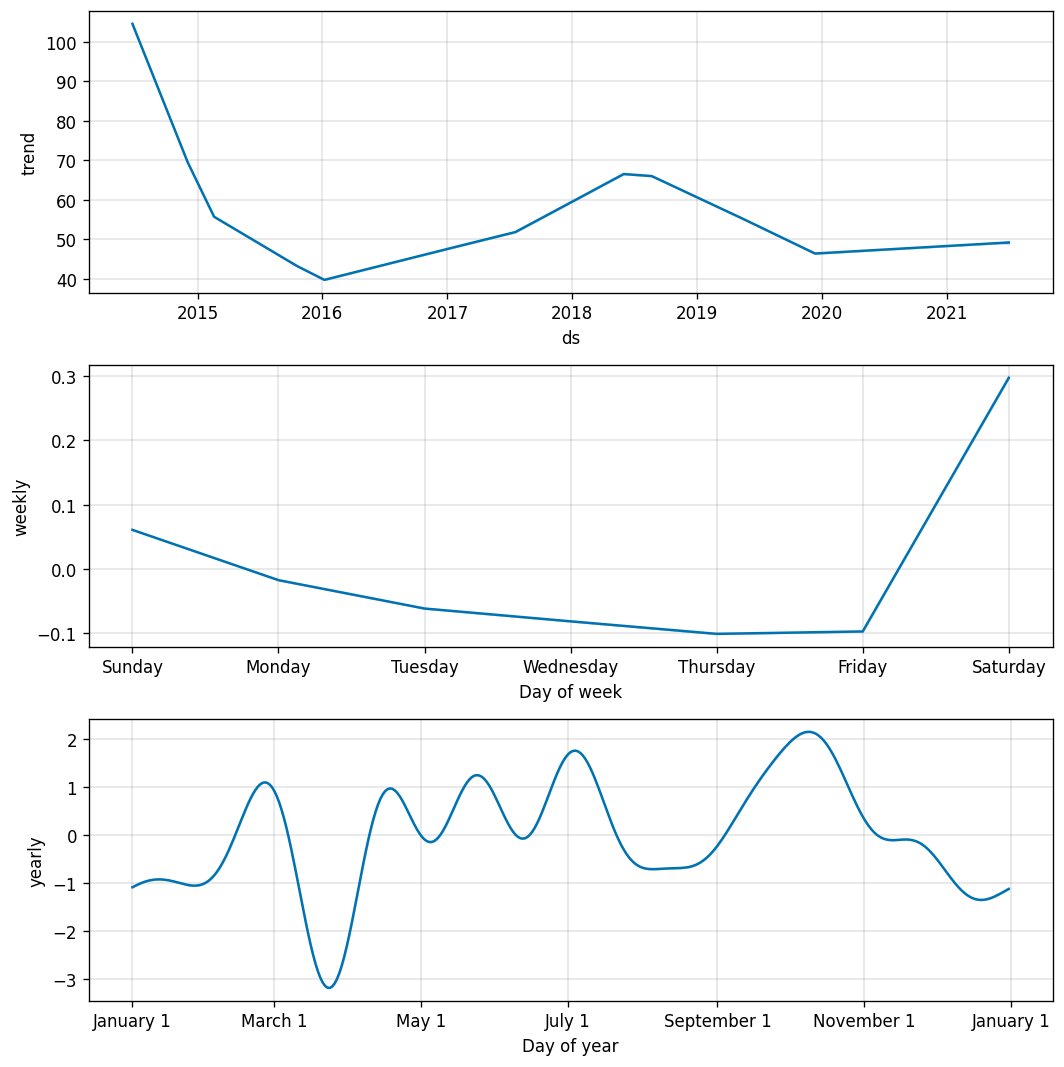

In [ ]:
# prepare expected column names
df = data.iloc[:,[2,  0 ]]
df.columns =  ['ds', 'y']
df['ds']= to_datetime(df['ds'])
df1 = df.iloc[:-60,:]
df2 = df.iloc[-60:,:]

# define the model
model = Prophet()#daily_seasonality=True)
# fit the model
model.fit(df1)

future = model.make_future_dataframe(periods=60)
future.tail()
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


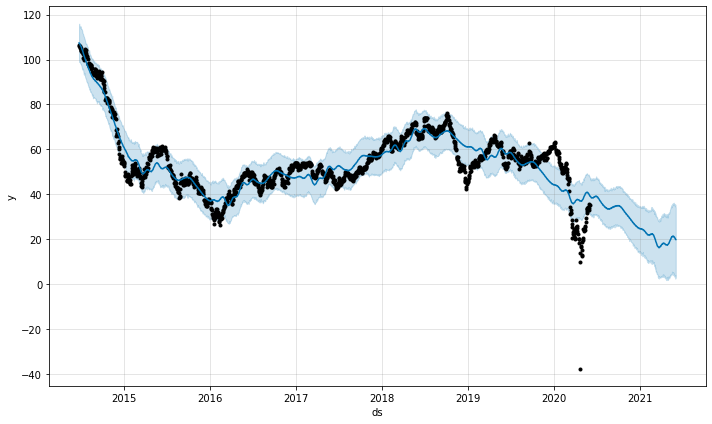

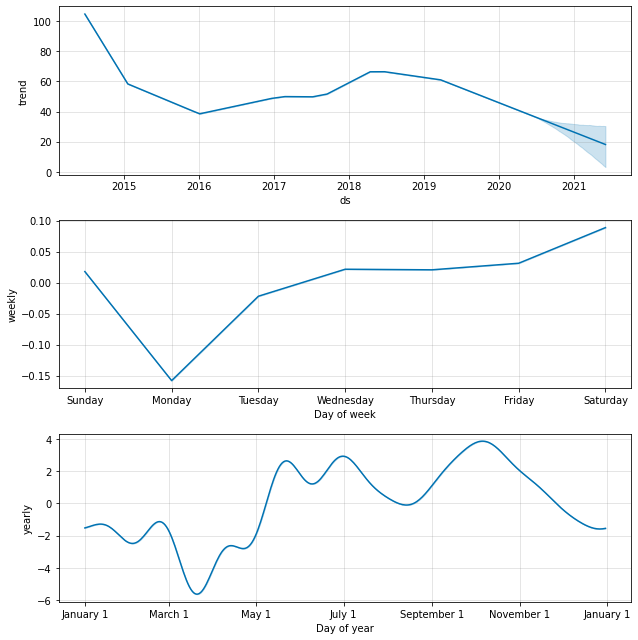

In [ ]:
# prepare expected column names
df = data.iloc[:,[2,  0 ]]
df.columns =  ['ds', 'y']
df['ds']= to_datetime(df['ds'])
df1 = df.iloc[:-300,:]
df2 = df.iloc[-300:,:]

# define the model
model = Prophet()#daily_seasonality=True)
# fit the model
model.fit(df1)

future = model.make_future_dataframe(periods=365)
future.tail()
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

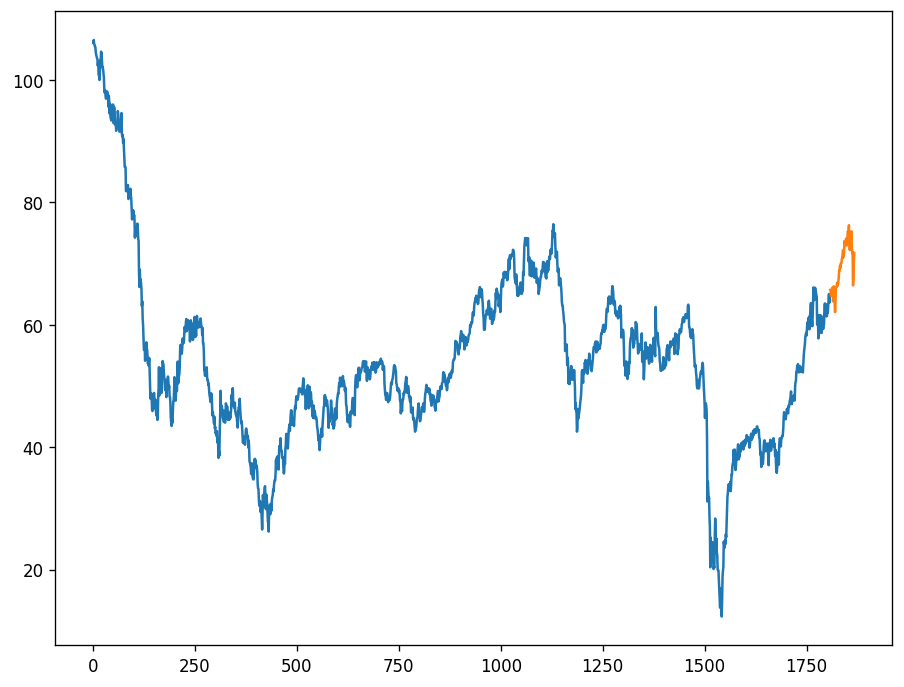

In [ ]:
df1.y.plot()
df2.y.plot()

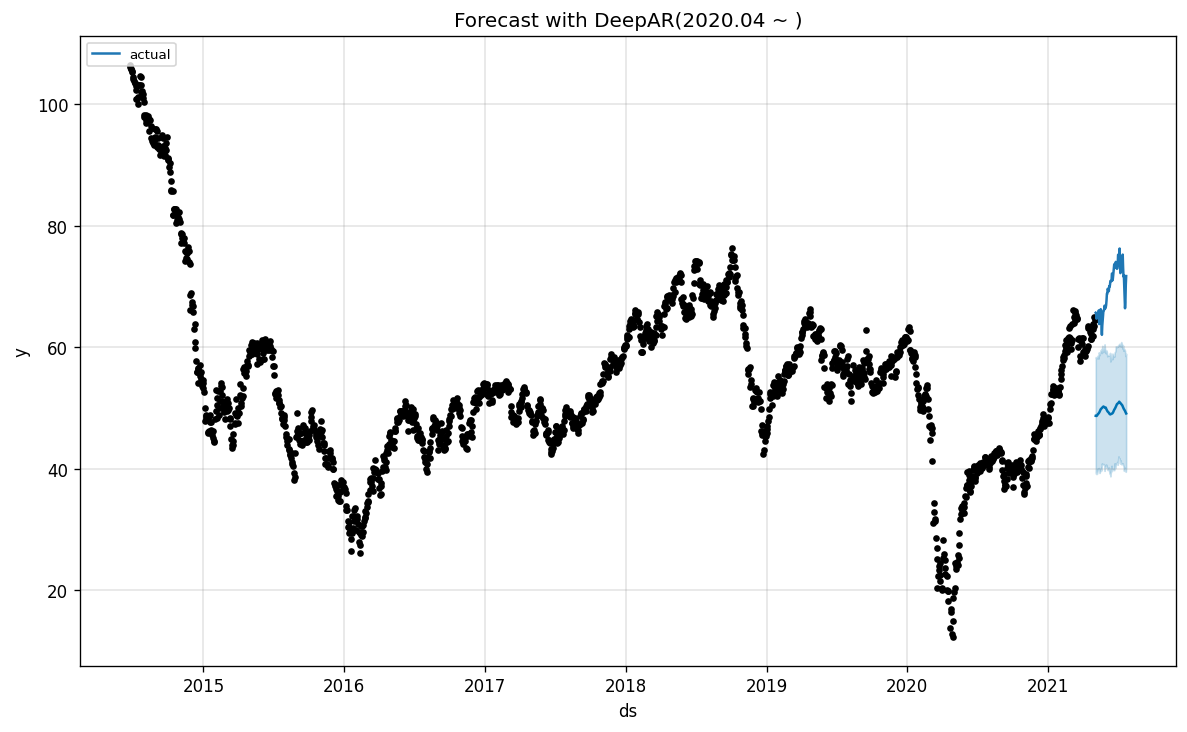

In [ ]:

model.plot(forecast)
plt.plot(df.ds[-60:], df.y[-60:], label='actual')
plt.title('Forecast with DeepAR(2020.04 ~ )')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [ ]:
df1.y

1       106.03
2       106.50
3       105.84
4       105.74
5       105.37
         ...  
1563     34.35
1564     32.81
1565     33.71
1566     35.49
1567     35.44
Name: y, Length: 1567, dtype: float64

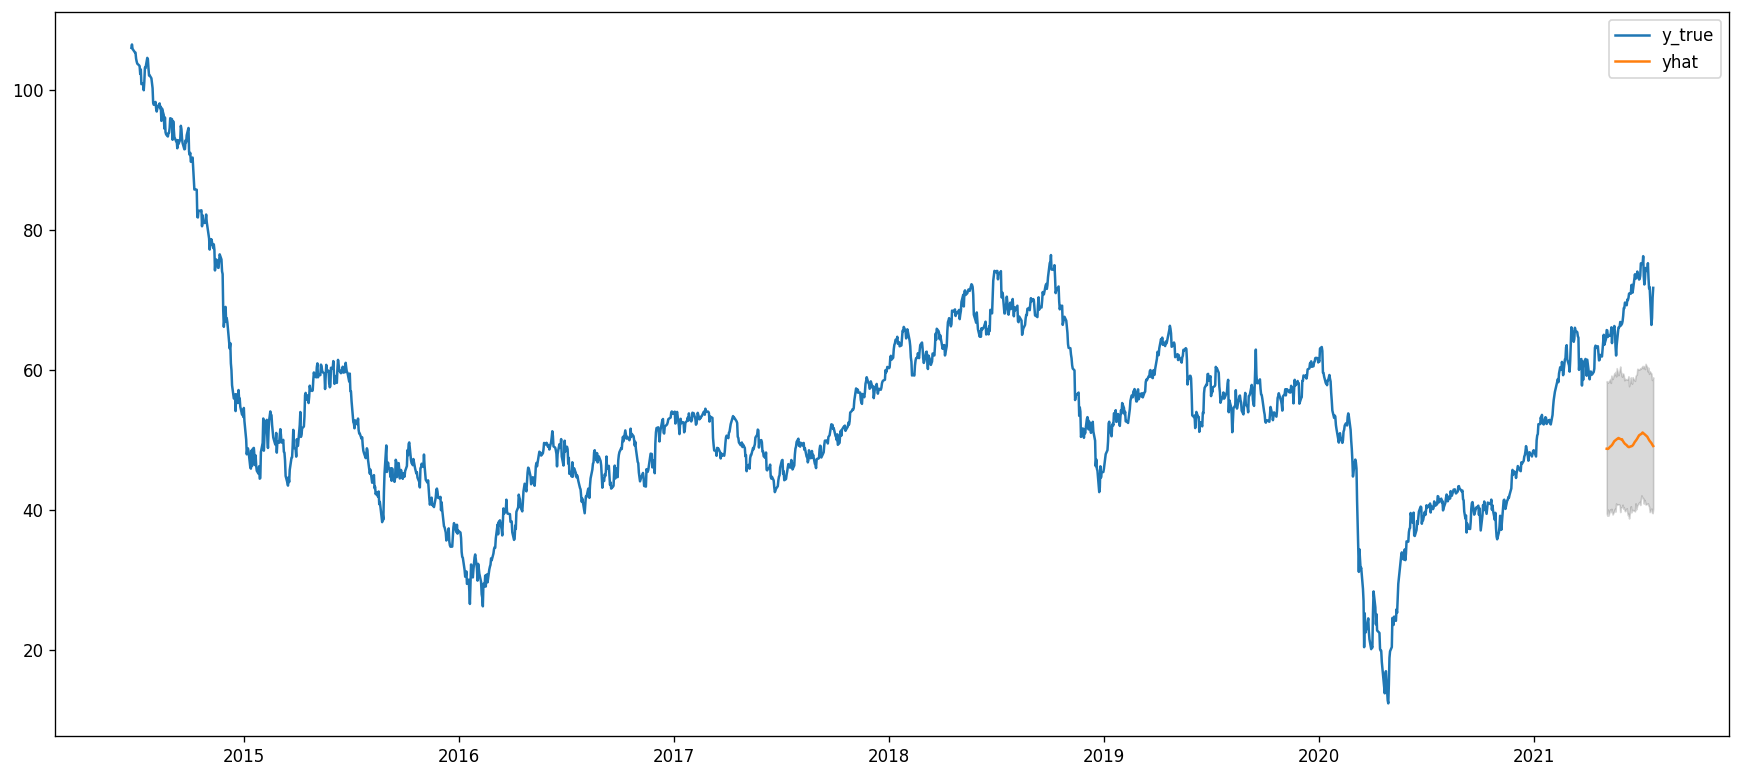

In [ ]:
# data.date= pd.to_datetime(data.date)

import matplotlib.pyplot as plt
plt.figure(figsize=(18, 8))
# plt.plot(data.date, data.Price_wti, label='GroundTruth')
plt.plot(df.ds, df.y, label='y_true')
plt.plot(forecast.ds, forecast.yhat, label='yhat')
# plt.plot(forecast.ds, forecast.yhat_upper, label='yhat_upper')
# plt.plot(forecast.ds, forecast.yhat_lower, label='yhat_lower')
plt.fill_between(data.date[-60:],forecast.yhat_upper,forecast.yhat_lower , color='k', alpha=.15)
plt.legend()
plt.show()

In [ ]:
# plt.fill_between(data.date,forecast.yhat_upper,forecast.yhat_lower , color='k', alpha=.15)
forecast.yhat_lower

0     39.503863
1     39.162931
2     40.037187
3     39.165490
4     40.072069
5     39.674324
6     40.143005
7     39.809040
8     39.331697
9     39.867224
10    40.163816
11    39.744018
12    40.909403
13    40.715464
14    40.801563
15    40.784104
16    40.670007
17    39.676507
18    40.314021
19    40.421383
20    40.728997
21    40.173216
22    40.359961
23    40.049998
24    39.800354
25    40.220431
26    39.570282
27    39.227288
28    39.433725
29    38.760557
30    40.513619
31    39.639898
32    39.979064
33    39.943926
34    39.965521
35    39.781044
36    40.924546
37    40.048658
38    40.333532
39    40.648189
40    41.051746
41    41.137350
42    40.686155
43    41.443340
44    42.060046
45    41.641745
46    41.684703
47    40.883383
48    41.427017
49    41.205520
50    40.752941
51    40.871726
52    40.918829
53    40.601712
54    40.475573
55    39.680541
56    40.186616
57    39.608123
58    39.523029
59    40.176159
Name: yhat_lower, dtype: float64

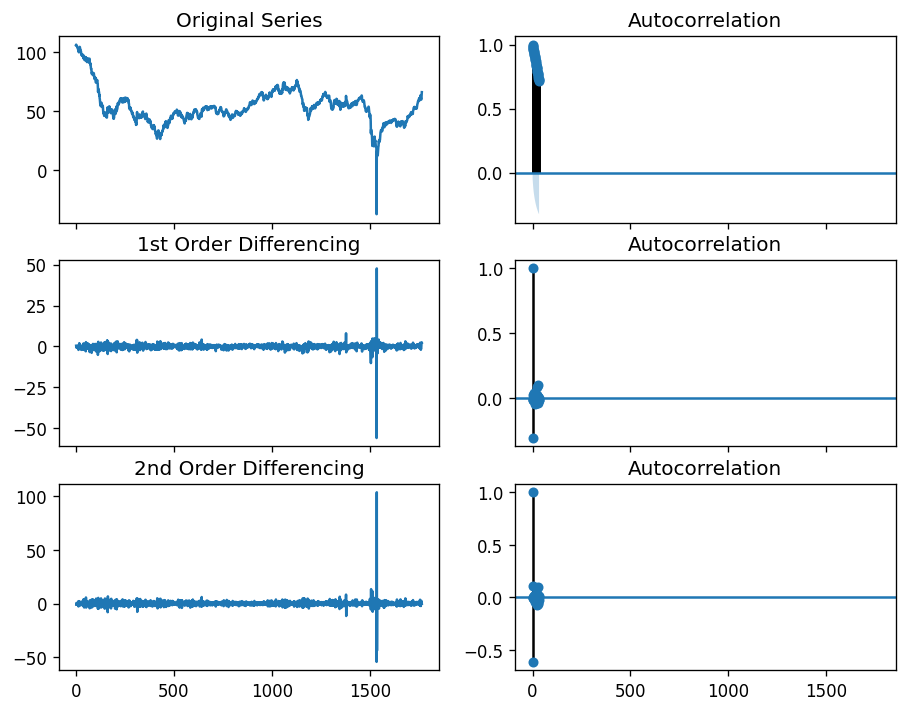

In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)
df_wti = data[:-100].Price_wti.reset_index(drop = True)

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df_wti); axes[0, 0].set_title('Original Series')
plot_acf(df_wti, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df_wti.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_wti.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df_wti.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_wti.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df_wti, order=(0,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())


                             ARIMA Model Results                              
Dep. Variable:            D.Price_wti   No. Observations:                 1766
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -3734.777
Method:                       css-mle   S.D. of innovations              2.005
Date:                Thu, 29 Jul 2021   AIC                           7475.554
Time:                        05:25:43   BIC                           7491.984
Sample:                             1   HQIC                          7481.625
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0234      0.030     -0.775      0.438      -0.082       0.036
ma.L1.D.Price_wti    -0.3685      0.022    -16.388      0.000      -0.413      -0.324
                        

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




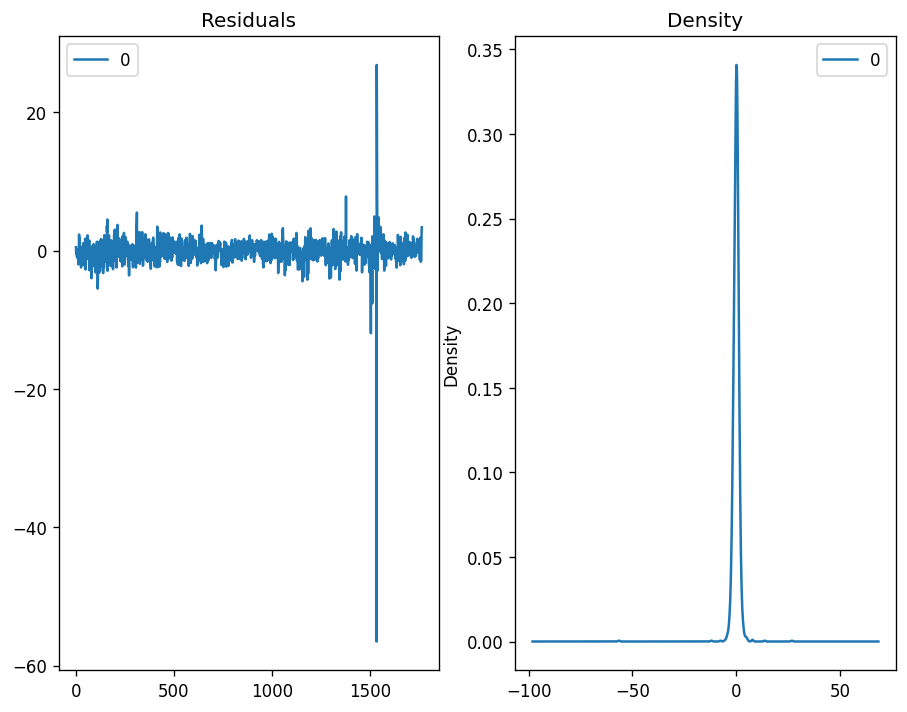

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

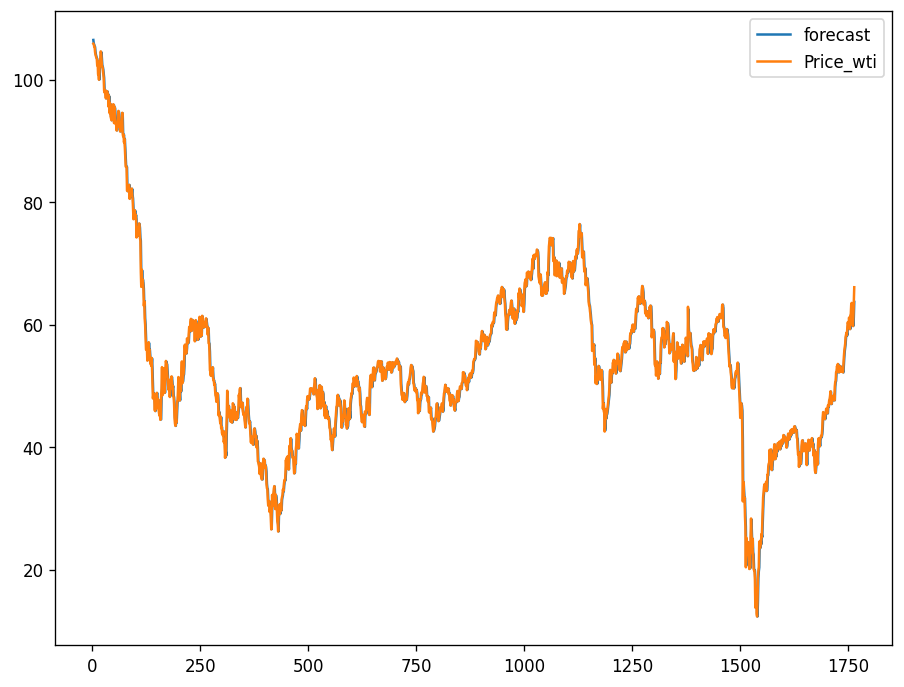

In [ ]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()


In [ ]:
data[:-60]

,Price_wti,Vol_wti,date,pct_change,log_ret
1,106.03,175.21,2014-06-24,-0.001319,-0.001320
2,106.50,249.06,2014-06-25,0.004433,0.004423
3,105.84,195.72,2014-06-26,-0.006197,-0.006216
4,105.74,128.98,2014-06-27,-0.000945,-0.000945
5,105.37,215.33,2014-06-30,-0.003499,-0.003505
...,...,...,...,...,...
1803,62.94,361.54,2021-04-27,0.016637,0.016500
1804,63.86,387.68,2021-04-28,0.014617,0.014511
1805,65.01,384.49,2021-04-29,0.018008,0.017848
1806,63.58,400.52,2021-04-30,-0.021997,-0.022242


In [ ]:
train

0       106.03
1       106.50
2       105.84
3       105.74
4       105.37
         ...  
1800     62.94
1801     63.86
1802     65.01
1803     63.58
1804     64.49
Name: Price_wti, Length: 1805, dtype: float64

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




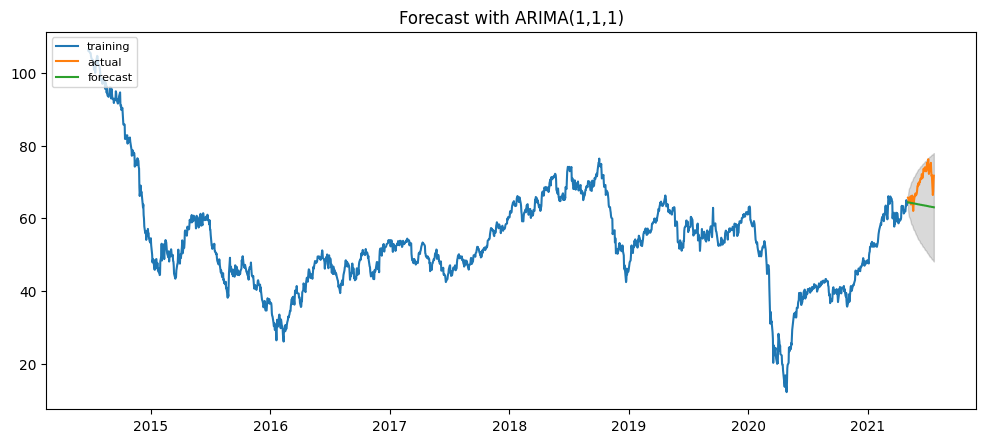

In [ ]:
from statsmodels.tsa.stattools import acf

df_wti = data.Price_wti.reset_index(drop = True)

# Create Training and Test
train = df_wti[:-60]
test = df_wti[-60:]

model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(60, alpha=0.1)  # 90% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(data[:-60].date, train, label='training')
plt.plot(data[-60:].date, test, label='actual')
plt.plot(data[-60:].date,fc_series, label='forecast')
plt.fill_between(data[-60:].date, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast with ARIMA(1,1,1)')
plt.legend(loc='upper left', fontsize=8)
plt.show()


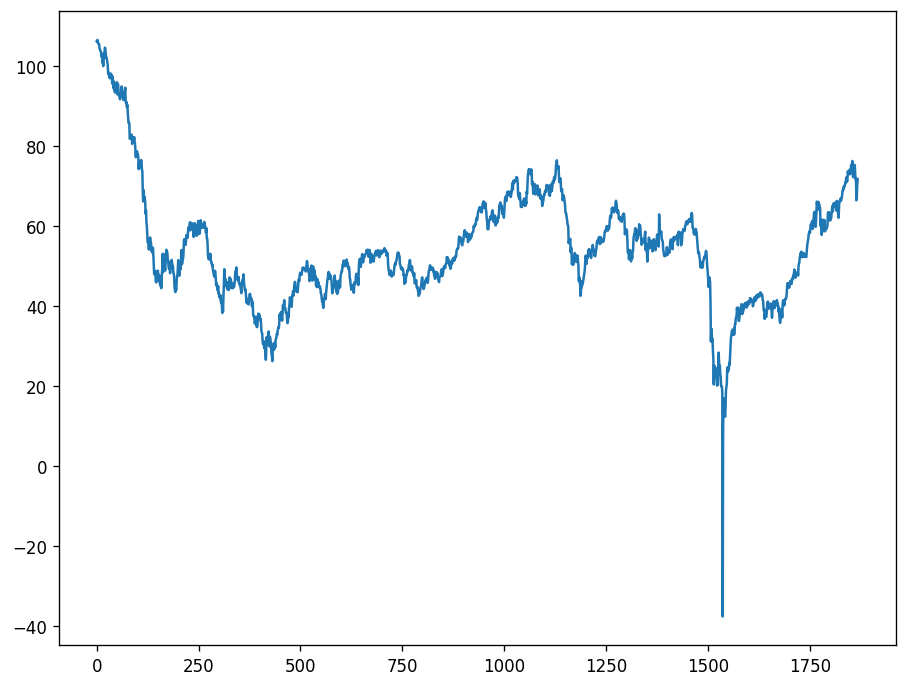

In [ ]:
|plt.plot(data.Price_wti)

In [ ]:
# https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
# import pmdarima as pyramid
from pmdarima.arima import auto_arima
df_wti = data_wti[:].Price_wti.reset_index(drop = True)

stepwise_model = auto_arima(df_wti[:-60], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=5.47 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=9018.189, Time=0.12 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=8337.471, Time=0.77 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=3.83 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=8843.128, Time=0.15 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=8118.419, Time=1.73 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=10.56 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=4.68 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=8301.000, Time=1.21 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=8085.627, Time=2.42 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=8298.831, Time=1.12 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=15.03 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=7.12 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=8077.878, Time=2.43 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=8290

In [ ]:

# Create Training and Test
train = df_wti[:-60]
test = df_wti[-60:]

stepwise_model.fit(train)
future_forecast = stepwise_model.predict(n_periods=60)

future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])

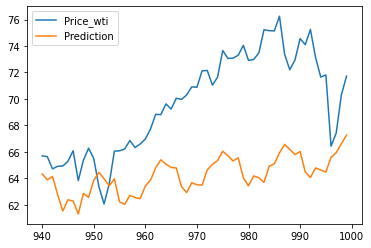

In [ ]:
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

pd.concat([test,future_forecast],axis=1).plot()

In [ ]:
df_wti[df_wti>0]

0       106.17
1       106.03
2       106.50
3       105.84
4       105.74
         ...  
1863     71.81
1864     66.42
1865     67.42
1866     70.30
1867     71.72
Name: Price_wti, Length: 1867, dtype: float64

ValueError: ignored

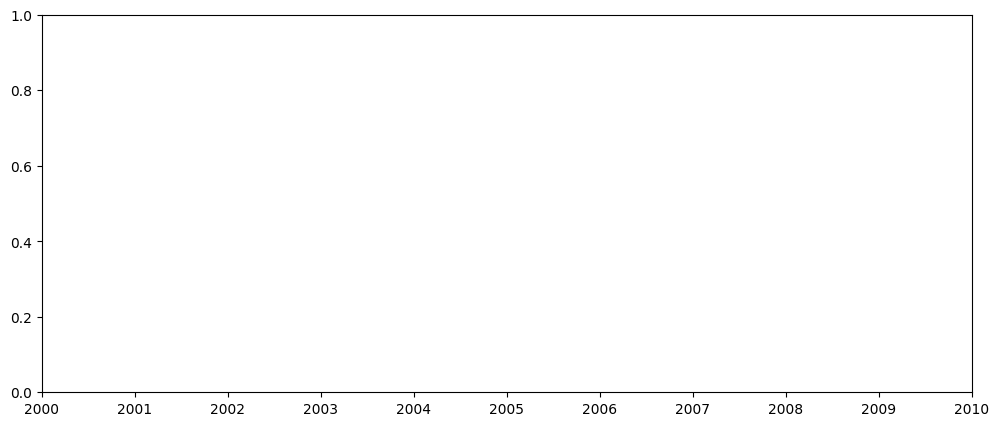

In [ ]:

plt.figure(figsize=(12,5), dpi=100)
# plt.plot(data[-700].ds[:-30], df_wti, label='training')
plt.plot(data[:].date, df_wti, label='actual')
plt.plot(data[-60:].date, future_forecast, label='forecast')
# plt.fill_between(lower_series.index, lower_series, upper_series, 
#                  color='k', alpha=.15)
plt.title('Forecast with AutoArima')
plt.legend(loc='upper left', fontsize=8)
# plt.show()

<Figure size 1560x600 with 0 Axes>

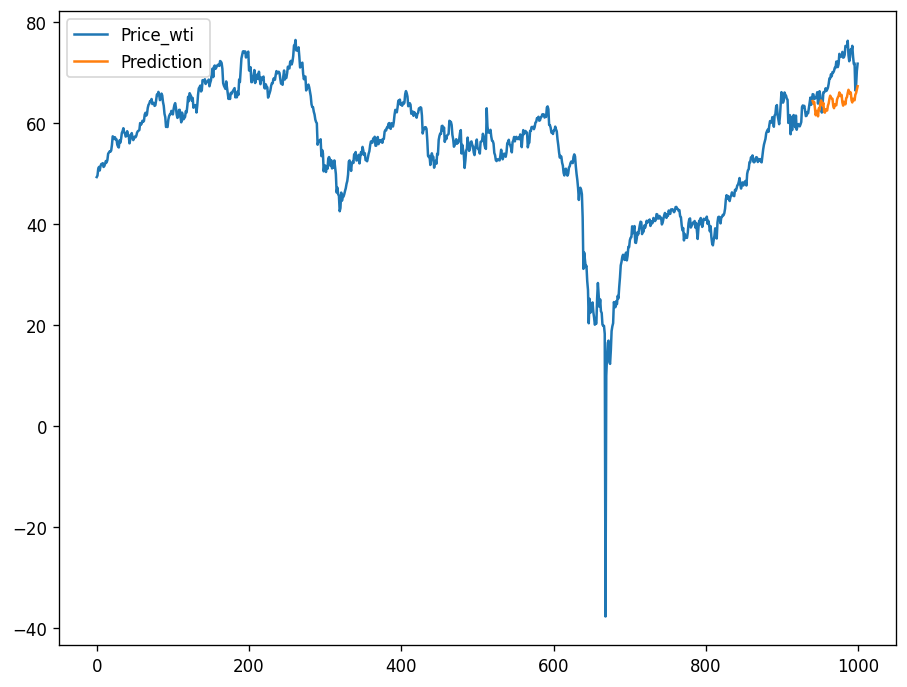

In [ ]:
plt.figure(figsize=(13,5))

pd.concat([df_wti,future_forecast],axis=1).plot()

In [ ]:
df_wti

0      49.29
1      49.58
2      50.92
3      51.30
4      50.60
       ...  
995    71.81
996    66.42
997    67.42
998    70.30
999    71.72
Name: Price_wti, Length: 1000, dtype: float64